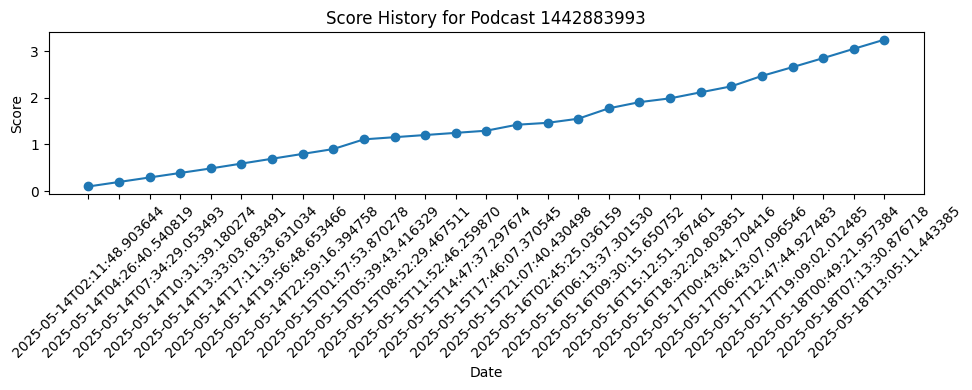

In [1]:
import sqlite3
import matplotlib.pyplot as plt

show_id = "1442883993"  # The Duran
conn = sqlite3.connect("../data/podcasts.db")
cursor = conn.cursor()

cursor.execute(
    """
    SELECT s.date, s.rank_score
    FROM score s
    JOIN podcast p ON s.podcast_id = p.id
    WHERE p.show_id = ?
    ORDER BY s.date ASC
    """,
    (show_id,),
)

rows = cursor.fetchall()
dates, scores = zip(*rows)

plt.figure(figsize=(10, 4))
plt.plot(dates, scores, marker="o")
plt.xticks(rotation=45)
plt.title(f"Score History for Podcast {show_id}")
plt.xlabel("Date")
plt.ylabel("Score")
plt.tight_layout()
plt.show()